<a href="https://colab.research.google.com/github/csce585-mlsystems/CSCE585ProjectROI/blob/michelleBranch/Pytorch_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install kaggle

In [ ]:
!pip install -q opendatasets

In [ ]:

import opendatasets as od

In [ ]:
od.download('https://www.kaggle.com/datasets/phucthaiv02/butterfly-image-classification')

Skipping, found downloaded files in "./butterfly-image-classification" (use force=True to force download)


In [ ]:
import kagglehub


# Download latest version
path = kagglehub.dataset_download("phucthaiv02/butterfly-image-classification")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'butterfly-image-classification' dataset.
Path to dataset files: /kaggle/input/butterfly-image-classification


In [ ]:
import pandas as pd
butterfly = pd.read_csv("/kaggle/input/butterfly-image-classification/Training_set.csv")
butterfly.head(10)

,filename,label
0,Image_1.jpg,SOUTHERN DOGFACE
1,Image_2.jpg,ADONIS
2,Image_3.jpg,BROWN SIPROETA
3,Image_4.jpg,MONARCH
4,Image_5.jpg,GREEN CELLED CATTLEHEART
5,Image_6.jpg,CAIRNS BIRDWING
6,Image_7.jpg,GREEN CELLED CATTLEHEART
7,Image_8.jpg,EASTERN DAPPLE WHITE
8,Image_9.jpg,BROWN SIPROETA
9,Image_10.jpg,RED POSTMAN


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=butterfly)

https://docs.google.com/spreadsheets/d/1YfEFcrjjr3j2xATwh5pvAdoxfEg0YPYNf3iwGdTgnaA/edit#gid=0


In [ ]:
# Assign the 'label' column to the 'labels' list
labels = butterfly['label'].tolist()
print(labels[:10]) # Print the first 10 labels for verification

['SOUTHERN DOGFACE', 'ADONIS', 'BROWN SIPROETA', 'MONARCH', 'GREEN CELLED CATTLEHEART', 'CAIRNS BIRDWING', 'GREEN CELLED CATTLEHEART', 'EASTERN DAPPLE WHITE', 'BROWN SIPROETA', 'RED POSTMAN']


In [ ]:
file_list = butterfly['filename'].tolist() #list the filename column

In [ ]:
class ImageDataset():
    # Must use __init__ (double underscore)
    def __init__(self, file_list, labels):
        # Assign the passed-in lists to instance variables
        self.file_list = file_list
        self.labels = labels

    def __getitem__(self, index):
        file = self.file_list[index]
        label = self.labels[index]
        return file, label

    def __len__(self):
        return len(self.labels)

# --- 3. CLASS INSTANTIATION (Now the variables are defined) ---
image_dataset = ImageDataset(file_list, labels)

# --- 4. USAGE ---
print(f"Dataset length: {len(image_dataset)}")
print("--- Sample data ---")
for i in range(5): # Print first 5 samples
    file, label = image_dataset[i]
    print(f"File: {file}, Label: {label}")

Dataset length: 6499
--- Sample data ---
File: Image_1.jpg, Label: SOUTHERN DOGFACE
File: Image_2.jpg, Label: ADONIS
File: Image_3.jpg, Label: BROWN SIPROETA
File: Image_4.jpg, Label: MONARCH
File: Image_5.jpg, Label: GREEN CELLED CATTLEHEART


Now we are applying transformations into the dataset

In [ ]:
pip install torch torchvision torchaudio

In [ ]:
import torchvision.transforms as transforms #resize the image
img_height, img_weight = 30, 80
# The size argument should be a tuple (height, width)
transform = transforms.Compose([transforms.ToTensor(), transforms.Resize((img_height, img_weight))])
print(transform)

Compose(
    ToTensor()
    Resize(size=(30, 80), interpolation=bilinear, max_size=None, antialias=True)
)


In [ ]:
from PIL import Image

class ImageDataset():
  def __init__(self, file_list, labels, transform=None, base_img_path="") :
    self.file_list = file_list
    self.labels = labels
    self.transform = transform
    self.base_img_path = base_img_path

  def __getitem__(self, index):
    file = self.file_list[index]
    label = self.labels[index]
    # Correct the full path to point directly to the image within the 'train' folder
    # Based on !ls -R output, images are directly in /train, not /Training/{label}
    full_img_path = f"{self.base_img_path}/train/{file}"
    img = Image.open(full_img_path)
    if self.transform is not None:
      img = self.transform(img)
    return img, label

  def __len__(self):
    return len(self.labels)

In [ ]:
!ls -R /content/butterfly-image-classification

/content/butterfly-image-classification:
test  Testing_set.csv  train  Training_set.csv

/content/butterfly-image-classification/test:
Image_1000.jpg	Image_1503.jpg	Image_2005.jpg	Image_2508.jpg	Image_501.jpg
Image_1001.jpg	Image_1504.jpg	Image_2006.jpg	Image_2509.jpg	Image_502.jpg
Image_1002.jpg	Image_1505.jpg	Image_2007.jpg	Image_250.jpg	Image_503.jpg
Image_1003.jpg	Image_1506.jpg	Image_2008.jpg	Image_2510.jpg	Image_504.jpg
Image_1004.jpg	Image_1507.jpg	Image_2009.jpg	Image_2511.jpg	Image_505.jpg
Image_1005.jpg	Image_1508.jpg	Image_200.jpg	Image_2512.jpg	Image_506.jpg
Image_1006.jpg	Image_1509.jpg	Image_2010.jpg	Image_2513.jpg	Image_507.jpg
Image_1007.jpg	Image_150.jpg	Image_2011.jpg	Image_2514.jpg	Image_508.jpg
Image_1008.jpg	Image_1510.jpg	Image_2012.jpg	Image_2515.jpg	Image_509.jpg
Image_1009.jpg	Image_1511.jpg	Image_2013.jpg	Image_2516.jpg	Image_50.jpg
Image_100.jpg	Image_1512.jpg	Image_2014.jpg	Image_2517.jpg	Image_510.jpg
Image_1010.jpg	Image_1513.jpg	Image_2015.jpg	Image_2518.

In [ ]:
# Instantiate the ImageDataset with the file_list, labels, transform, and the base path
# Correcting base_img_path to where opendatasets typically downloads the files
base_dataset_dir = "/content/butterfly-image-classification"
image_dataset = ImageDataset(file_list, labels, transform, base_img_path=base_dataset_dir)

print(f"Dataset length: {len(image_dataset)}")
print("--- Sample data ---")
for i in range(5): # Print first 5 samples
    img_tensor, label = image_dataset[i]
    print(f"File: {file_list[i]}, Image Tensor Shape: {img_tensor.shape}, Label: {label}")

Dataset length: 6499
--- Sample data ---
File: Image_1.jpg, Image Tensor Shape: torch.Size([3, 30, 80]), Label: SOUTHERN DOGFACE
File: Image_2.jpg, Image Tensor Shape: torch.Size([3, 30, 80]), Label: ADONIS
File: Image_3.jpg, Image Tensor Shape: torch.Size([3, 30, 80]), Label: BROWN SIPROETA
File: Image_4.jpg, Image Tensor Shape: torch.Size([3, 30, 80]), Label: MONARCH
File: Image_5.jpg, Image Tensor Shape: torch.Size([3, 30, 80]), Label: GREEN CELLED CATTLEHEART


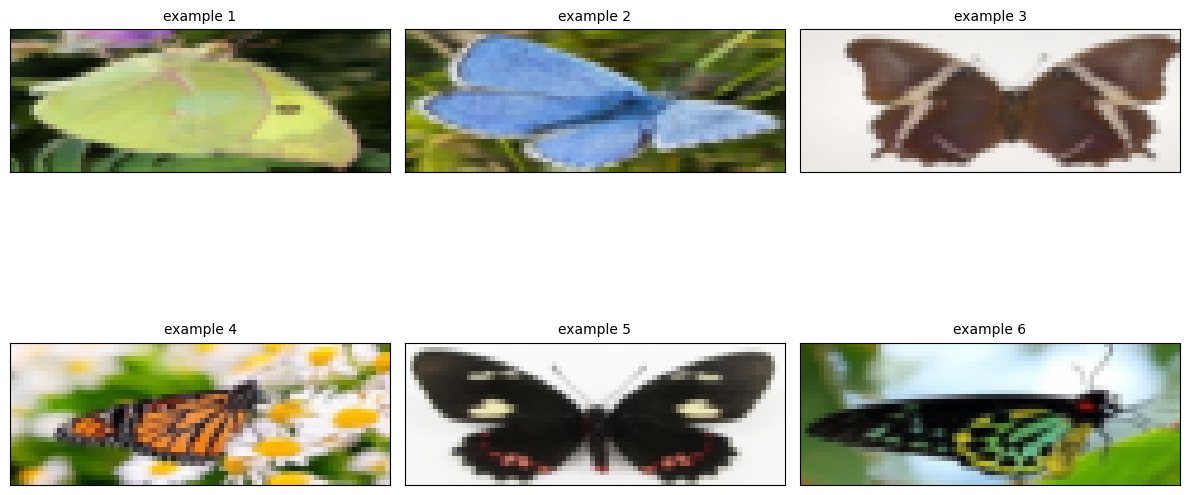

In [ ]:
#Lets visualize the data
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(12,8))
for i in range(6): # Limit to 6 samples to fit in a 2x3 grid
  # Ensure the dataset has enough samples before trying to access them
  if i >= len(image_dataset):
    break
  example = image_dataset[i]
  ax = fig.add_subplot(2,3,i+1)
  ax.set_xticks([]); ax.set_yticks([])
  ax.imshow(example[0].numpy().transpose(1,2,0))
  ax.set_title(f'example {i+1}', size=10) # Changed title to show sample number

plt.tight_layout()
plt.show()